# **머신 러닝 (Machine Learning) 개요**
- 머신러닝은영상처리,번역기,음성인식,스팸메일탐지등굉장히다양한분야에서응용되고있습니다. 특히머신러닝의한갈래인딥러닝은자연어처리엔지니어에게필수역량이되어가고있습입니다. 이 번 챕터에서는 머신 러닝의 개념과 선형 회귀, 로지스틱 회귀, 소프트맥스 회귀와 같은 기본적인 모델을 이해합니다. 그리고 이러한 이해를 바탕으로 다음 딥 러닝 챕터에서 기본적인 모델로부터 딥 러닝 모델로 개념을 확장해보겠습니다.

## **머신 러닝이란 (What is Machine Learning?)**
- 딥 러닝을 포함하고 있는 개념인 머신 러닝 (Machine Learning) 의 개념에 대해서 학습합니다.

**1. 머신 러닝 (Machine Learning) 이 아닌 접근 방법의 한계**

- 머신 러닝이 아닌 기존의 프로그래밍 작성 방식을 통해서는 해결하기 어려운 문제 예시를 하나 들어보겠
습니다.
- 예시:주어진 사진으로부터 고양이 사진인지 강아지 사진인지 판별하는 일.
- 위 문제는 실제 2017 년에 있었던 DGIST 의 딥 러닝 경진대회의 문제입니다. 사진을 보고 고양이 사진인 지,강아지사진인지판단하는건사람에게는너무나쉬운일입니다. 그런데이문제를풀수있는프로그 램을 작성하는 것은 상당히 난해한 수준입니다. 입력된 이미지로부터 강아지와 고양이를 구분할 수 있는 코드를 어떻게 작성할 수 있을까요?
  - def prediction(이 미 지 as input):
  - 어떻게 코딩해야하지?
  - return 결과

- 사진이란 건 사진을 보는 각도, 조명, 타겟의 변형 (고양이의 자세) 에 따라서 너무나 천차만별이라 사진으 로부터 공통된 명확한 특징을 잡아내는 것이 쉽지 않습니다. 사실, 결론을 미리 말씀드리면 해당 프로그 램은 숫자를 정렬하는 것과 같은 명확한 알고리즘이 애초에 존재하지 않습니다.

**2. 머신 러닝 방식**

- 머신러닝이 위에서 언급한 예시문제를 해결할 수 있는 이유는 해결을 위한 접근방식이 기존의 프로그래밍 방식과는 다르기 때문입니다. 위 이미지에서 위쪽은 기존의 프로그래밍의 접근 방식, 아래쪽은 머신 러닝의 접근 방식을 보여줍니다. 머신 러닝은 데이터가 주어지면, 기계가 스스로 데이터로부터 규칙성 을 찾는 것에 집중합니다. 주어진 데이터로부터 규칙성을 찾는 과정을 우리는 **훈련 (training)** 또는 **학습(learning)** 이라고 합니다.
일단 규칙성을 발견하고나면, 그 후에 들어오는 새로운 데이터에 대해서 발견한 규칙성을 기준으로 정답 을 찾아내는데 이는 기존의 프로그래밍 방식으로 접근하기 어려웠던 문제의 해결책이 되기도 합니다. 이미지를 예시로 들었지만 자연어 처리도 이미지 처리 만큼이나 어려운 문제들이 많습니다. 최근에는 머신 러닝의 한 갈래인 딥 러닝이 자연어 처리에서 굉장히 뛰어난 성능을 보여주고 있습니다. 단적으로, 구글번역기와 같은 기계 번역기가 그러한데, 이러한 번역기는 사람이 직접 규칙을 정의해서 만드는 것보다 딥
러닝으로 모델이 스스로 규칙을 찾아내도록 구현하는 것이 훨씬 더 좋은 성능을 얻을 수 있습니다.

**자동 미분과 선형 회귀 실습**
- 선형 회귀를 텐서플로우와 케라스를 통해 구현

In [ ]:
import tensorflow as tf

tape_gradient() 는 자동 미분 기능을 수행합니다. 임의로 2𝑤제곱 + 5 라는 식을 세워보고,
𝑤 에 대해 미분해기

In [ ]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

In [3]:
with tf.GradientTape() as tape:
  z= f(w)

gradients = tape.gradient(z,[w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


**자동미분을이용한선형회귀구현**

- 우선 가중치 변수 w와 b를 선언
- 학습될 값이므로 임의의 값인 4와 1로 초기화

In [4]:
w = tf.Variable(4.0)
b = tf.Variable(1.0)

가설을 함수로서 정의

In [6]:
@tf.function
def hypothesis(x):
  return w*x + b

In [7]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [8]:
@tf.function
def mse_loss(y_pred, y):
  #두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

In [9]:
x=[1,2,3,4,5,6,7,8,9]# 공부하는 시간
y=[11,22,33,44,53,66,77,87,95]# 각 공부하는 시간에 맵핑되는 성적

In [10]:
optimizer = tf.optimizers.SGD(0.01)

In [20]:
for i in range(301):
  with tf.GradientTape() as tape:
  # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)
    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred,y)
  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost,[w,b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".
          format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 9.6918 | b의 값 : 1.894 | cost : 173.778214
epoch :  10 | w의 값 : 10.4979 | b의 값 : 1.972 | cost : 1.348798
epoch :  20 | w의 값 : 10.5054 | b의 값 : 1.925 | cost : 1.325963
epoch :  30 | w의 값 : 10.5126 | b의 값 :  1.88 | cost : 1.304936
epoch :  40 | w의 값 : 10.5195 | b의 값 : 1.837 | cost : 1.285577
epoch :  50 | w의 값 : 10.5261 | b의 값 : 1.795 | cost : 1.267739
epoch :  60 | w의 값 : 10.5324 | b의 값 : 1.755 | cost : 1.251314
epoch :  70 | w의 값 : 10.5385 | b의 값 : 1.717 | cost : 1.236184
epoch :  80 | w의 값 : 10.5443 | b의 값 :  1.68 | cost : 1.222252
epoch :  90 | w의 값 : 10.5499 | b의 값 : 1.645 | cost : 1.209422
epoch : 100 | w의 값 : 10.5553 | b의 값 : 1.611 | cost : 1.197604
epoch : 110 | w의 값 : 10.5605 | b의 값 : 1.579 | cost : 1.186721
epoch : 120 | w의 값 : 10.5654 | b의 값 : 1.547 | cost : 1.176698
epoch : 130 | w의 값 : 10.5702 | b의 값 : 1.517 | cost : 1.167468
epoch : 140 | w의 값 : 10.5748 | b의 값 : 1.489 | cost : 1.158965
epoch : 150 | w의 값 : 10.5791 | b의 값 : 1.461 | cost : 1.151132
epoch :

In [21]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35414  54.294846 59.60841  64.92198 ]


**케라스로 구현하는 선형 회귀**
- 케라스에 대해서는 뒤의 딥 러닝 챕터에서 더 자세히 배우겠지만, 간단하게 케라스를 이용해서 선형 회귀 를 구현해봅시다. 케라스로 모델을 만드는 기본적인 형식은 다음과 같습니다. Sequential 로 model 이라는 이름의 모델을 만들고, 그리고 add를 통해 입력과 출력 벡터의 차원과 같은 필요한 정보들을 추가해 갑니다.

In [22]:
#예시 코드.실행 불가.
model = Sequential()
model.add(keras.layers.Dense(1, input_dim=1))

NameError: name 'Sequential' is not defined

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [29]:
x=[1,2,3,4,5,6,7,8,9]# 공부하는 시간
y=[11,22,33,44,53,66,77,87,95]# 각 공부하는 시간에 맵핑되는 성적

# Convert lists to NumPy arrays
x = np.array(x)
y = np.array(y)

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선 형 회 귀 이 므 로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

#sgd는 경사 하강법을 의미. 학습률(learningrate,lr)은 0.01.
sgd = optimizers.SGD(learning_rate=0.01)

# 손실 함수(Lossfunction)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300) # Now x and y are NumPy arrays

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step - loss: 3949.2969 - mse: 3949.2969
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 487.0174 - mse: 487.0174
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 61.0086 - mse: 61.0086
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.5902 - mse: 8.5902
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 2.1393 - mse: 2.1393
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.3443 - mse: 1.3443
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.2452 - mse: 1.2452
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.2318 - mse: 1.2318
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.2289 - mse: 1.2289
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.2273 - mse: 1.2273
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.2259 - mse: 1.2259
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.2246 - mse: 1.2246
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/st

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


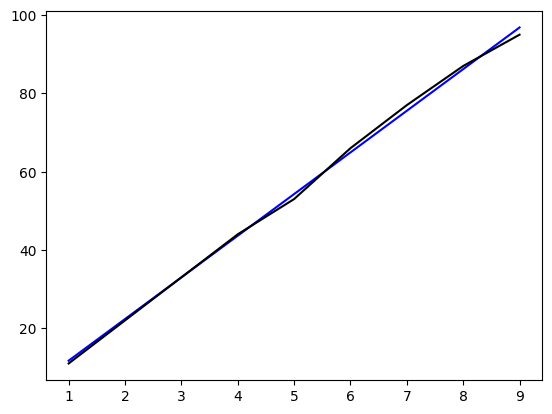

In [31]:
plt.plot(x, model.predict(x),'b',x,y,'k')